In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기

In [3]:
area = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#1. 공공자전거_대여소_정보/area.csv', encoding = 'cp949')

In [4]:
area

,Unnamed: 0,location_num,location_name,district,address,y,x,install_date,LCD,QR,type
0,4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,0,LCD
1,5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,0,LCD
2,6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,0,LCD
3,7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0,7,QR
4,8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,0,LCD
...,...,...,...,...,...,...,...,...,...,...,...
2149,2153,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,0,20,QR
2150,2154,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,0,10,QR
2151,2155,1088.0,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,0,12,QR
2152,2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,0,10,QR


# 2. 자치구 파악

In [5]:
area['district'].unique() #총 25개 자치구

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [58]:
area_rental_count = pd.DataFrame(area['district'].value_counts()) #자치구별 대여소 개수
area_rental_count

,district
강서구,152
송파구,133
서초구,122
강남구,118
영등포구,108
마포구,102
종로구,99
구로구,91
노원구,88
강동구,84


<AxesSubplot:title={'center':'자치구별 대여소 수'}, xlabel='count', ylabel='district'>

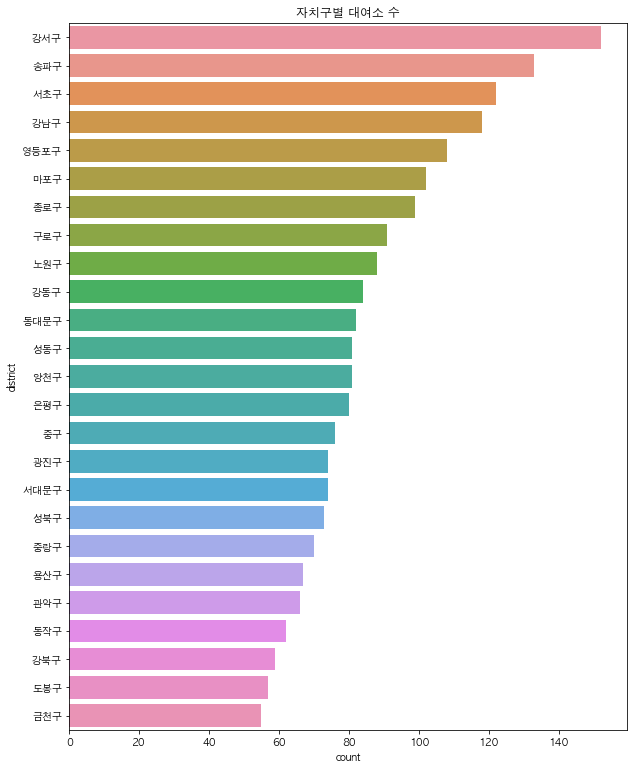

In [65]:
plt.figure(figsize=(10,13))
plt.title('자치구별 대여소 수')
sns.countplot(y=area['district'], order = ['강서구','송파구','서초구','강남구','영등포구','마포구','종로구', '구로구','노원구',
                                         '강동구', '동대문구', '성동구', '양천구', '은평구', '중구', '광진구', '서대문구','성북구',
                                         '중랑구', '용산구', '관악구', '동작구', '강북구','도봉구', '금천구'])

# 3. 지역별 이용행태 분석

## 3-1. [공공자전거_이용정보(시간대별)] 데이터와 결합

In [13]:
trip = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#4. 공공자전거_대여이력_정보/rental_data_2019.csv', encoding = 'cp949')
rental = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#5. 공공자전거_이용정보(시간대별)/new_ride_data_2019.csv', encoding = 'cp949')


In [73]:
rental = rental.rename(columns={'rental_loc_no':'location_num'})
rental

,Unnamed: 0,bike_no,rental_date,location_num,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
0,0,SPB-10632,2019-01-01 00:00:44,1421,신내역 4번출구,3,2019-01-01 00:03:53,1420,신내어울공원 앞,13,2,580.0
1,1,SPB-10957,2019-01-01 00:02:16,1408,먹골역 6번출구 앞,3,2019-01-01 00:07:07,1433,중화역 2번출구,4,4,1020.0
2,2,SPB-16067,2019-01-01 00:04:12,347,동대문역사문화공원역 9번출구 앞,17,2019-01-01 00:07:07,387,훈련원공원주차장 앞,1,2,550.0
3,3,SPB-17170,2019-01-01 00:03:09,615,용두동 래미안허브리츠아파트 앞,4,2019-01-01 00:07:27,612,시립동부병원 앞 사거리,14,3,700.0
4,4,SPB-14130,2019-01-01 00:01:44,1177,수명중?고교,7,2019-01-01 00:08:09,1152,마곡역교차로,1,5,1090.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18485948,18485948,SPB-18675,2019-12-31 23:38:14,430,KEB하나은행 장충동지점,5,2020-01-01 01:58:18,430,KEB하나은행 장충동지점,7,135,3770.0
18485949,18485949,SPB-13564,2019-12-31 16:08:16,1673,노원역?5번출구,6,2020-01-01 02:32:10,1636,백병원 사거리 농협은행 앞,8,623,620.0
18485950,18485950,SPB-11208,2019-12-31 21:11:33,2307,압구정 한양 3차 아파트,5,2020-01-01 02:47:59,3534,건대입구역 5번출구 뒤,6,80,3820.0
18485951,18485951,SPB-23946,2019-12-31 23:59:58,327,낙원상가 옆,1,2020-01-01 03:02:20,327,낙원상가 옆,1,174,11890.0


In [74]:
rental_area = pd.merge(rental,area, how='outer',on='location_num')

In [75]:
rental_area

,Unnamed: 0_x,bike_no,rental_date,location_num,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,...,Unnamed: 0_y,location_name,district,address,y,x,install_date,LCD,QR,type
0,0.0,SPB-10632,2019-01-01 00:00:44,1421.0,신내역 4번출구,3.0,2019-01-01 00:03:53,1420.0,신내어울공원 앞,13.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
1,150.0,SPB-15008,2019-01-01 00:16:31,1421.0,신내역 4번출구,18.0,2019-01-01 00:37:57,1608.0,공릉역 1번 출구 앞,6.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
2,1768.0,SPB-19554,2019-01-01 04:32:36,1421.0,신내역 4번출구,16.0,2019-01-01 04:50:54,1433.0,중화역 2번출구,7.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
3,3257.0,SPB-16956,2019-01-01 12:03:28,1421.0,신내역 4번출구,13.0,2019-01-01 12:15:58,1421.0,신내역 4번출구,1.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
4,5555.0,SPB-16956,2019-01-01 16:58:42,1421.0,신내역 4번출구,1.0,2019-01-01 17:06:25,1438.0,홈플러스 신내점 앞,12.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522570,NaN,NaN,NaN,1085.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2153.0,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,0.0,20.0,QR
18522571,NaN,NaN,NaN,1086.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2154.0,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,0.0,10.0,QR
18522572,NaN,NaN,NaN,1088.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2155.0,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,0.0,12.0,QR
18522573,NaN,NaN,NaN,1089.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2156.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,0.0,10.0,QR


In [76]:
rental_area = rental_area.dropna(subset = ['rental_date'])
rental_area

,Unnamed: 0_x,bike_no,rental_date,location_num,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,...,Unnamed: 0_y,location_name,district,address,y,x,install_date,LCD,QR,type
0,0.0,SPB-10632,2019-01-01 00:00:44,1421.0,신내역 4번출구,3.0,2019-01-01 00:03:53,1420.0,신내어울공원 앞,13.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
1,150.0,SPB-15008,2019-01-01 00:16:31,1421.0,신내역 4번출구,18.0,2019-01-01 00:37:57,1608.0,공릉역 1번 출구 앞,6.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
2,1768.0,SPB-19554,2019-01-01 04:32:36,1421.0,신내역 4번출구,16.0,2019-01-01 04:50:54,1433.0,중화역 2번출구,7.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
3,3257.0,SPB-16956,2019-01-01 12:03:28,1421.0,신내역 4번출구,13.0,2019-01-01 12:15:58,1421.0,신내역 4번출구,1.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
4,5555.0,SPB-16956,2019-01-01 16:58:42,1421.0,신내역 4번출구,1.0,2019-01-01 17:06:25,1438.0,홈플러스 신내점 앞,12.0,...,499.0,신내역 4번출구,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18521938,18467874.0,SPB-24199,2019-12-30 23:34:43,3543.0,세종대학교(학술정보원),5.0,2019-12-30 23:39:29,3518.0,군자역 7번출구뒤,4.0,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521939,18478157.0,SPB-16995,2019-12-31 15:28:15,3543.0,세종대학교(학술정보원),13.0,2019-12-31 15:53:38,3543.0,세종대학교(학술정보원),13.0,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521940,18479391.0,SPB-16995,2019-12-31 16:46:34,3543.0,세종대학교(학술정보원),13.0,2019-12-31 16:59:00,501.0,광진구의회 앞,10.0,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521941,18479781.0,SPB-13394,2019-12-31 17:06:37,3543.0,세종대학교(학술정보원),11.0,2019-12-31 17:18:00,3520.0,광진경찰서,7.0,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD


In [80]:
rental_area = rental_area.drop(['Unnamed: 0_x','Unnamed: 0_y','location_name'], axis = 1)

KeyError: "['Unnamed: 0_x' 'Unnamed: 0_y' 'location_name'] not found in axis"

In [81]:
rental_area

,bike_no,rental_date,location_num,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance,district,address,y,x,install_date,LCD,QR,type
0,SPB-10632,2019-01-01 00:00:44,1421.0,신내역 4번출구,3.0,2019-01-01 00:03:53,1420.0,신내어울공원 앞,13.0,2.0,580.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
1,SPB-15008,2019-01-01 00:16:31,1421.0,신내역 4번출구,18.0,2019-01-01 00:37:57,1608.0,공릉역 1번 출구 앞,6.0,21.0,3870.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
2,SPB-19554,2019-01-01 04:32:36,1421.0,신내역 4번출구,16.0,2019-01-01 04:50:54,1433.0,중화역 2번출구,7.0,17.0,3430.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
3,SPB-16956,2019-01-01 12:03:28,1421.0,신내역 4번출구,13.0,2019-01-01 12:15:58,1421.0,신내역 4번출구,1.0,12.0,490.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
4,SPB-16956,2019-01-01 16:58:42,1421.0,신내역 4번출구,1.0,2019-01-01 17:06:25,1438.0,홈플러스 신내점 앞,12.0,7.0,1070.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18521938,SPB-24199,2019-12-30 23:34:43,3543.0,세종대학교(학술정보원),5.0,2019-12-30 23:39:29,3518.0,군자역 7번출구뒤,4.0,4.0,1210.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521939,SPB-16995,2019-12-31 15:28:15,3543.0,세종대학교(학술정보원),13.0,2019-12-31 15:53:38,3543.0,세종대학교(학술정보원),13.0,25.0,2750.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521940,SPB-16995,2019-12-31 16:46:34,3543.0,세종대학교(학술정보원),13.0,2019-12-31 16:59:00,501.0,광진구의회 앞,10.0,12.0,1900.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521941,SPB-13394,2019-12-31 17:06:37,3543.0,세종대학교(학술정보원),11.0,2019-12-31 17:18:00,3520.0,광진경찰서,7.0,10.0,1590.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD


In [83]:
rental_area.to_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#4. 공공자전거_대여이력_정보/trip_area_2019.csv', encoding = 'cp949')

In [21]:
rental_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34464777 entries, 0 to 34464776
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   Unnamed: 0.1   int64  
 2   date           object 
 3   time           int64  
 4   location_num   int64  
 5   location_name  object 
 6   rental_code    object 
 7   sex            object 
 8   age            object 
 9   usage          int64  
 10  calories       object 
 11  carbon         object 
 12  distance       float64
 13  usage_time     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 3.6+ GB


In [22]:
rental_area['rental_code'].value_counts()

정기권         27180950
일일권          7045151
단체권           238008
일일권(비회원)         665
단기권(전기)            3
Name: rental_code, dtype: int64

In [23]:
rental_area['sex'].value_counts()

M    10671668
F     6587175
Name: sex, dtype: int64

In [24]:
rental_area['age'].value_counts()

20대    14959882
30대     8198817
40대     5306988
50대     3118103
10대     1908166
60대      813929
70대      158892
Name: age, dtype: int64

## 3-2. 자치구별 그룹 생성

In [26]:
rental_grouped = rental_area.groupby('district')

In [27]:
for key, group in rental_grouped:
    print("* key", key)
    print("* count", len(group))
    print(group.head())
    print('\n')


* key 강남구
* count 1369539
        Unnamed: 0_x  Unnamed: 0.1        date  time  location_num  \
345850            14            14  2019-01-01     0          2401   
345851         10718         10718  2019-01-02    17          2401   
345852         11818         11818  2019-01-02    18          2401   
345853         22996         22996  2019-01-03    21          2401   
345854         28948         28948  2019-01-04    14          2401   

                  location_name_x rental_code sex  age  usage  ...  \
345850  2401. 밀알학교 입구 (삼성서울병원 입구)         정기권   F  30대      1  ...   
345851  2401. 밀알학교 입구 (삼성서울병원 입구)         정기권   M  40대      1  ...   
345852  2401. 밀알학교 입구 (삼성서울병원 입구)         정기권   M  60대      1  ...   
345853  2401. 밀알학교 입구 (삼성서울병원 입구)         정기권   M  40대      1  ...   
345854  2401. 밀알학교 입구 (삼성서울병원 입구)         정기권   M  40대      1  ...   

       Unnamed: 0_y      location_name_y  district         address          y  \
345850       1912.0  밀알학교 입구 (삼성서울병원 입구)       강남구 

        Unnamed: 0_x  Unnamed: 0.1        date  time  location_num  \
813293            30            30  2019-01-01     0          2230   
813294           579           579  2019-01-01     2          2230   
813295          3582          3582  2019-01-01    17          2230   
813296          4872          4872  2019-01-01    22          2230   
813297          5832          5832  2019-01-02     6          2230   

       location_name_x rental_code sex  age  usage  ... Unnamed: 0_y  \
813293  2230.이수역 4번 출구         정기권   F  50대      1  ...       1724.0   
813294  2230.이수역 4번 출구         정기권   F  20대      1  ...       1724.0   
813295  2230.이수역 4번 출구         정기권   F  50대      1  ...       1724.0   
813296  2230.이수역 4번 출구         정기권   F  30대      1  ...       1724.0   
813297  2230.이수역 4번 출구         정기권   F  20대      1  ...       1724.0   

       location_name_y  district               address          y           x  \
813293       이수역 4번 출구       서초구  서울특별시 동작구 사당로 지하 310  37.485828

## 3-3. 자치구별 이용성별 비율

In [28]:
pd.set_option('display.max_colwidth',-1)

<ipython-input-28-dc5dda32fe3d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [29]:
rental_grouped_sex = pd.DataFrame(rental_grouped['sex'].value_counts())

In [30]:
rental_grouped_sex

sex
district sex        
강남구      M    419060
         F    233733
강동구      M    360898
         F    230471
강북구      M    189887
         F    127585
강서구      M    669630
         F    471520
관악구      M    352846
         F    211218
광진구      M    524953
         F    354703
구로구      M    381566
         F    236508
금천구      M    169803
         F    94141 
노원구      M    473507
         F    316707
도봉구      M    167099
         F    121732
동대문구     M    414979
         F    237609
동작구      M    282240
         F    155286
마포구      M    758035
         F    508992
서대문구     M    360300
         F    215835
서초구      M    457369
         F    257851
성동구      M    509095
         F    329706
성북구      M    351940
         F    192215
송파구      M    698358
         F    534197
양천구      M    398998
         F    242243
영등포구     M    886003
         F    489051
용산구      M    253550
         F    153661
은평구      M    336427
         F    230544
종로구      M    547249
         F    260289
중구       M    326060
         F    145377
중랑구      M    292381
         F    191581

In [54]:
area_sex = ( rental_grouped_sex.loc['district'])['M'].sum()/( ans2.loc['district'])['F'].sum()
area_sex

KeyError: 'sex'

/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matp

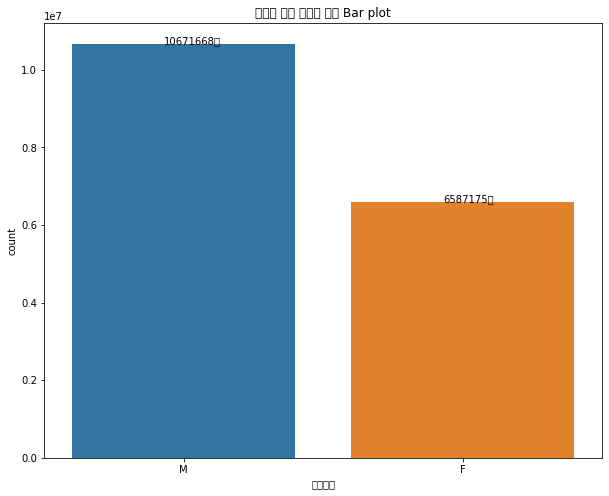

In [40]:
ordered_index = rental.value_counts('sex').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='sex',data=rental, order=ordered_index)

plt.title('음식에 따른 서울시 맛집 Bar plot')
plt.xlabel('음식종류')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/matp

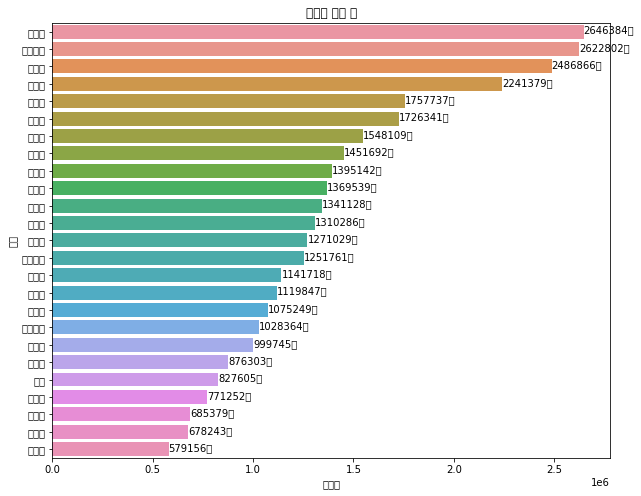

In [44]:
ordered_index = rental_area.value_counts('district').index
plt.figure(figsize=(10,8))
ax = sns.countplot(y="district", data=rental_area, order=ordered_index)
plt.title('도시별 맛집 수')
plt.xlabel('맛집수')
plt.ylabel('도시')
    
for p in ax.patches:
    ax.annotate('{:.0f}개'.format(p.get_width()), (p.get_width(),p.get_y() + 0.5))

<AxesSubplot:xlabel='district'>

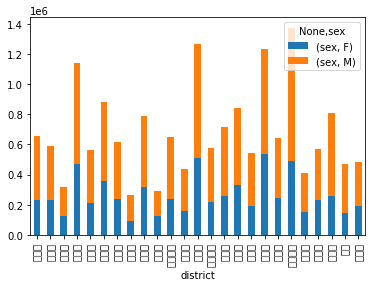

In [51]:
rental_grouped_sex.unstack().plot(kind='bar', stacked=True)

## 3-4. 자치구별 연령대 분포

In [31]:
rental_grouped['age'].value_counts()

district  age
강남구       20대    526367
          30대    359011
          40대    248136
          50대    146626
          10대     47131
                  ...  
중랑구       40대    128361
          50대     94389
          10대     75885
          60대     23288
          70대      5287
Name: age, Length: 175, dtype: int64

In [31]:
rental_grouped_age = pd.DataFrame(rental_grouped['age'].value_counts())
rental_grouped_age

age
district age        
강남구      20대  526367
         30대  359011
         40대  248136
         50대  146626
         10대  47131 
...              ...
중랑구      40대  128361
         50대  94389 
         10대  75885 
         60대  23288 
         70대  5287  

[175 rows x 1 columns]

<AxesSubplot:xlabel='district'>

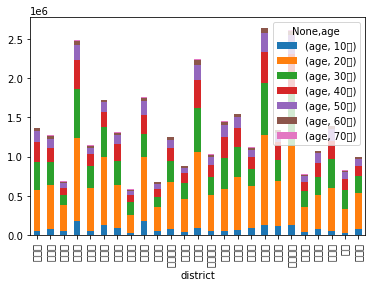

In [52]:
rental_grouped_age.unstack().plot(kind='bar', stacked=True)

## 3-5. 자치구별 대여구분코드 현황

In [28]:
rental_grouped['rental_code'].value_counts()

district  rental_code
강남구       정기권            1074425
          일일권             285880
          단체권               9221
          일일권(비회원)            13
강동구       정기권            1010415
                          ...   
중구        일일권(비회원)            14
중랑구       정기권             799154
          일일권             194483
          단체권               6101
          일일권(비회원)             7
Name: rental_code, Length: 100, dtype: int64

In [45]:
rental_grouped_code = pd.DataFrame(rental_grouped['rental_code'].value_counts())
rental_grouped_code

rental_code
district rental_code             
강남구      정기권          1074425    
         일일권          285880     
         단체권          9221       
         일일권(비회원)     13         
강동구      정기권          1010415    
...                   ..         
중구       일일권(비회원)     14         
중랑구      정기권          799154     
         일일권          194483     
         단체권          6101       
         일일권(비회원)     7          

[100 rows x 1 columns]